In [1]:
import pandas as pd

testdata = pd.read_csv('TestData.csv')

In [3]:
print(testdata.head())

    Program   TestArea Result             StartTime               EndTime
0      Meta  Diagnosis   PASS  12/5/2023 1:29:20 PM  12/5/2023 1:29:20 PM
1      Meta  Diagnosis   PASS  12/5/2023 1:29:21 PM  12/5/2023 1:29:21 PM
2      Meta  Diagnosis   PASS  12/5/2023 1:29:22 PM  12/5/2023 1:29:22 PM
3      Meta     H_FOVI   PASS  12/5/2023 1:29:22 PM  12/5/2023 1:29:22 PM
4  Spectrum   Spectrum   FAIL  12/5/2023 1:40:19 PM  12/5/2023 2:00:48 PM


In [ ]:
# Data Preprocessing
testdata['Program'] = testdata['Program'].astype('category')
testdata['TestArea'] = testdata['TestArea'].astype('category')
testdata['Result'] = testdata['Result'].astype('category')

testdata['StartTime'] = pd.to_datetime(testdata['StartTime'], format='%m/%d/%Y %I:%M:%S %p')
testdata['EndTime'] = pd.to_datetime(testdata['EndTime'], format='%m/%d/%Y %I:%M:%S %p')

print(testdata.info())

    Program   TestArea Result           StartTime             EndTime
0      Meta  Diagnosis   PASS 2023-12-05 13:29:20 2023-12-05 13:29:20
1      Meta  Diagnosis   PASS 2023-12-05 13:29:21 2023-12-05 13:29:21
2      Meta  Diagnosis   PASS 2023-12-05 13:29:22 2023-12-05 13:29:22
3      Meta     H_FOVI   PASS 2023-12-05 13:29:22 2023-12-05 13:29:22
4  Spectrum   Spectrum   FAIL 2023-12-05 13:40:19 2023-12-05 14:00:48


In [6]:
# Calculate Test Duration in minutes
testdata["TestDuration_Minutes"] = (testdata["EndTime"] - testdata["StartTime"]).dt.total_seconds() / 60

# Extract Year, Month, and Quarter
testdata["Year"] = testdata["StartTime"].dt.year
testdata["Month"] = testdata["StartTime"].dt.month
testdata["Quarter"] = testdata["StartTime"].dt.quarter

# Drop StartTime and EndTime since we now have the duration
testdata = testdata.drop(columns=["StartTime", "EndTime"])

print(testdata.head())

    Program   TestArea Result  TestDuration_Minutes  Year  Month  Quarter
0      Meta  Diagnosis   PASS              0.000000  2023     12        4
1      Meta  Diagnosis   PASS              0.000000  2023     12        4
2      Meta  Diagnosis   PASS              0.000000  2023     12        4
3      Meta     H_FOVI   PASS              0.000000  2023     12        4
4  Spectrum   Spectrum   FAIL             20.483333  2023     12        4


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ["Program", "TestArea", "Result"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    testdata[col] = le.fit_transform(testdata[col])
    label_encoders[col] = le  # Save encoders for later use

print(testdata.head())


   Program  TestArea  Result  TestDuration_Minutes  Year  Month  Quarter
0       10        50      59              0.000000  2023     12        4
1       10        50      59              0.000000  2023     12        4
2       10        50      59              0.000000  2023     12        4
3       10        88      59              0.000000  2023     12        4
4       13       148      50             20.483333  2023     12        4


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features (X) and target variable (y)
X = testdata.drop(columns=["TestDuration_Minutes"])
y = testdata["TestDuration_Minutes"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


Mean Absolute Error: 40.207649011952846
Mean Squared Error: 457868.06832552305


In [ ]:
yearly_dist = testdata.groupby("Year")["TestDuration_Minutes"].agg(["count", "mean", "sum"])
yearly_dist.columns = ["TotalTests", "AvgDuration_Minutes", "TotalDuration_Minutes"]
print(yearly_dist)


In [11]:
monthly_dist = testdata.groupby(["Year", "Month"])["TestDuration_Minutes"].agg(["count", "mean", "sum"])
monthly_dist.columns = ["TotalTests", "AvgDuration_Minutes", "TotalDuration_Minutes"]
print(monthly_dist)


            TotalTests  AvgDuration_Minutes  TotalDuration_Minutes
Year Month                                                        
1970 1           52313             0.000000               0.000000
1998 1               1             0.000000               0.000000
1999 12              2             0.000000               0.000000
2000 1              26             0.000000               0.000000
2001 1              24             0.000000               0.000000
...                ...                  ...                    ...
2044 2               4             7.645833              30.583333
2061 4               3             3.083333               9.250000
2116 11              1             4.983333               4.983333
2118 2               1            58.733333              58.733333
2119 7               1            19.316667              19.316667

[106 rows x 3 columns]


In [12]:
quarterly_dist = testdata.groupby(["Year", "Quarter"])["TestDuration_Minutes"].agg(["count", "mean", "sum"])
quarterly_dist.columns = ["TotalTests", "AvgDuration_Minutes", "TotalDuration_Minutes"]
print(quarterly_dist)


              TotalTests  AvgDuration_Minutes  TotalDuration_Minutes
Year Quarter                                                        
1970 1             52313             0.000000           0.000000e+00
1998 1                 1             0.000000           0.000000e+00
1999 4                 2             0.000000           0.000000e+00
2000 1                26             0.000000           0.000000e+00
2001 1                24             0.000000           0.000000e+00
     2                 2             0.000000           0.000000e+00
2003 1                 1             0.000000           0.000000e+00
2005 1                37             0.000000           0.000000e+00
     3                 2             0.000000           0.000000e+00
2008 1                 1             0.000000           0.000000e+00
2011 1                32             0.000000           0.000000e+00
2012 3                 2             0.000000           0.000000e+00
2013 1                 1          

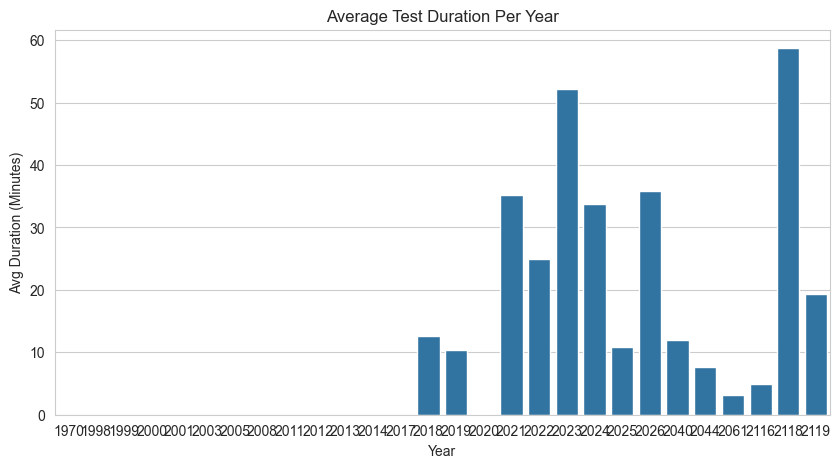

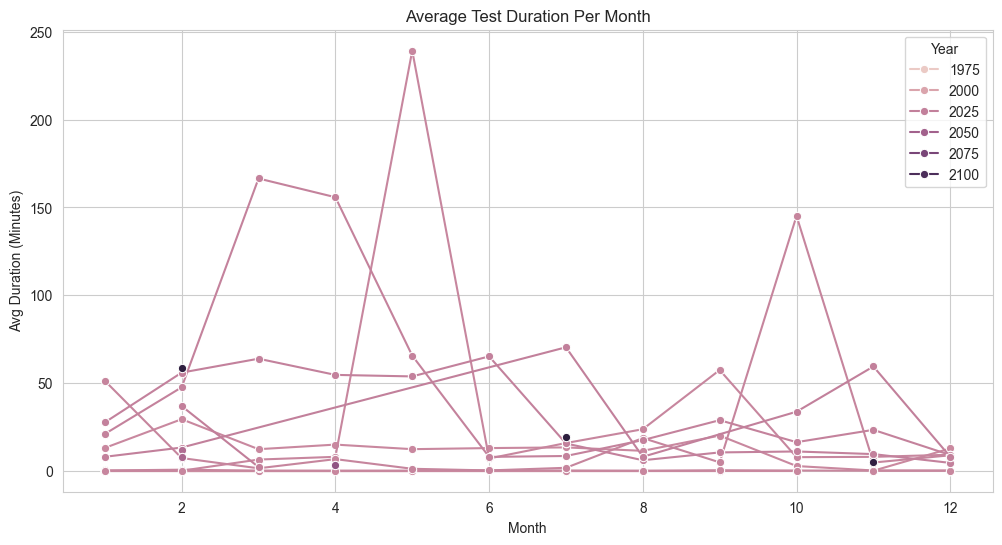

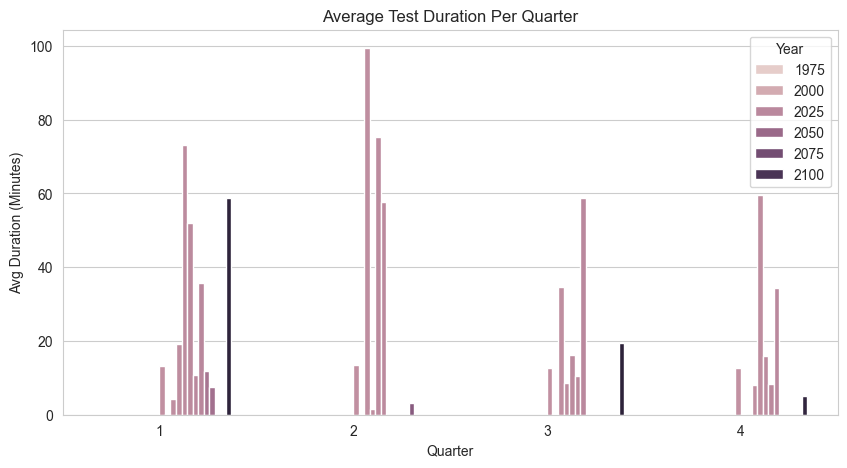

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set plot style
sns.set_style("whitegrid")

# Plot Yearly Test Durations
plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_dist.index, y=yearly_dist["AvgDuration_Minutes"])
plt.title("Average Test Duration Per Year")
plt.xlabel("Year")
plt.ylabel("Avg Duration (Minutes)")
plt.show()

# Plot Monthly Test Durations
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_dist, x="Month", y="AvgDuration_Minutes", hue="Year", marker="o")
plt.title("Average Test Duration Per Month")
plt.xlabel("Month")
plt.ylabel("Avg Duration (Minutes)")
plt.legend(title="Year")
plt.show()

# Plot Quarterly Test Durations
plt.figure(figsize=(10, 5))
sns.barplot(x=quarterly_dist.index.get_level_values("Quarter"), 
            y=quarterly_dist["AvgDuration_Minutes"], 
            hue=quarterly_dist.index.get_level_values("Year"))
plt.title("Average Test Duration Per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Avg Duration (Minutes)")
plt.legend(title="Year")
plt.show()


In [15]:
# save the distribution data to a CSV file
yearly_dist.to_csv('YearlyDistribution.csv')
monthly_dist.to_csv('MonthlyDistribution.csv')
quarterly_dist.to_csv('QuarterlyDistribution.csv')

In [16]:
import joblib

# Save model and encoders
joblib.dump(model, "test_duration_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print("Model and encoders saved successfully!")

# Load the model and encoders for future predictions
model = joblib.load("test_duration_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")


Model and encoders saved successfully!


In [ ]:
# Example new data
new_data = pd.DataFrame({
    "Program": ["Program A"],
    "TestArea": ["Hardware"],
    "Result": ["Pass"]
})

# Encode categorical variables
for col in categorical_cols:
    new_data[col] = label_encoders[col].transform(new_data[col])

# Make prediction
predicted_time = model.predict(new_data)
print(f"Predicted Test Duration: {predicted_time[0]:.2f} minutes")
